# 10 minutes to pandas

In [65]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

## Object Creation

Creating a Series by passing a list of values, letting pandas create a default integer index

In [6]:
s= pd.Series([1,2,3,np.nan,6,8])
s

0    1.0
1    2.0
2    3.0
3    NaN
4    6.0
5    8.0
dtype: float64

Creating a DataFrame by passing a numpy array, with a datetime index and labeled columns

In [8]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [71]:
df = pd.DataFrame(np.random.randn(6,4), index = dates, columns=list('ABCD'))
df

,A,B,C,D
2013-01-01,-0.313456,1.613896,1.474515,1.872675
2013-01-02,-1.012228,-0.680803,-1.034450,0.765278
2013-01-03,-0.673941,-1.418109,-0.216661,0.176017
2013-01-04,-1.874012,0.754934,1.999618,0.376690
2013-01-05,1.012471,-0.738664,0.132729,0.060468
2013-01-06,-0.299173,0.153372,-0.320623,0.693548


 Creating a DataFrame by passing a dict of objects that can be converted to series-like

In [13]:
df2 = pd.DataFrame({'A' : 1.,
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype=float),
                    'D' : np.array([3] * 4, dtype='int32'),
                    'E' : pd.Categorical(['test','train','test','train']),
                    'F' : 'foo' })
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


Having Specific dtypes

In [14]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float64
D             int32
E          category
F            object
dtype: object

If you're using IPython, tab completion for column names(as well as public attributes) is automatically enabled.

Here's a subset of the attributes that will be completed

In [ ]:
df2.<TAB>

df2.A
df2.abs
df2.add
df2.add_prefix
df2.add_suffix
df2.align
df2.all
df2.any
df2.append
df2.apply
df2.applymap
df2.as_blocks
df2.asfreq
df2.as_matrix
df2.astype
df2.at
df2.at_time
df2.axes
df2.B
df2.between_time
df2.bfill
df2.blocks
df2.bool

In [ ]:
df2.boxplot
df2.C
df2.clip
df2.clip_lower
df2.clip_upper
df2.columns
df2.combine
df2.combineAdd
df2.combine_first
df2.combineMult
df2.compound
df2.consolidate
df2.convert_objects
df2.copy
df2.corr
df2.corrwith
df2.count
df2.cov
df2.cummax
df2.cummin
df2.cumsum
df2.D

As you see, the columns A,B,C and D are automatically lab completed. E is there as well; the rest of the

attributes have been truncated for brevity.

## Viewing Data

See the top & bottom rows of the frame

In [16]:
df.head()

,A,B,C,D
2013-01-01,-0.105930,-1.283717,-0.554378,-1.006442
2013-01-02,0.842857,-0.337760,-1.033900,0.459933
2013-01-03,0.120107,0.776476,0.490729,-0.390481
2013-01-04,1.821269,-0.573953,0.787195,1.374177
2013-01-05,-0.625072,-0.126446,-2.652881,-0.829968


In [17]:
df.tail(3)

,A,B,C,D
2013-01-04,1.821269,-0.573953,0.787195,1.374177
2013-01-05,-0.625072,-0.126446,-2.652881,-0.829968
2013-01-06,1.833866,-0.309833,0.111981,0.066185


Display the index, columns and the underlying numpy data

In [18]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [19]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [20]:
df.values

array([[-0.10592991, -1.28371749, -0.55437823, -1.00644233],
       [ 0.84285674, -0.33776005, -1.0338997 ,  0.45993265],
       [ 0.12010707,  0.77647569,  0.49072931, -0.39048097],
       [ 1.82126916, -0.57395309,  0.78719465,  1.37417704],
       [-0.62507209, -0.12644557, -2.65288135, -0.82996795],
       [ 1.83386581, -0.30983312,  0.1119807 ,  0.06618478]])

Describe shows a quick statistic summary of your data

In [21]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.647849,-0.309206,-0.475209,-0.054433
std,1.028455,0.668234,1.259536,0.887778
min,-0.625072,-1.283717,-2.652881,-1.006442
25%,-0.049421,-0.514905,-0.914019,-0.720096
50%,0.481482,-0.323797,-0.221199,-0.162148
75%,1.576666,-0.172292,0.396042,0.361496
max,1.833866,0.776476,0.787195,1.374177


Transposing your data

In [22]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.105930,0.842857,0.120107,1.821269,-0.625072,1.833866
B,-1.283717,-0.337760,0.776476,-0.573953,-0.126446,-0.309833
C,-0.554378,-1.033900,0.490729,0.787195,-2.652881,0.111981
D,-1.006442,0.459933,-0.390481,1.374177,-0.829968,0.066185


Sorting by axis

In [23]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.006442,-0.554378,-1.283717,-0.105930
2013-01-02,0.459933,-1.033900,-0.337760,0.842857
2013-01-03,-0.390481,0.490729,0.776476,0.120107
2013-01-04,1.374177,0.787195,-0.573953,1.821269
2013-01-05,-0.829968,-2.652881,-0.126446,-0.625072
2013-01-06,0.066185,0.111981,-0.309833,1.833866


Sorting by Values

In [28]:
df.sort_values(by='C',axis=0)

,A,B,C,D
2013-01-05,-0.625072,-0.126446,-2.652881,-0.829968
2013-01-02,0.842857,-0.337760,-1.033900,0.459933
2013-01-01,-0.105930,-1.283717,-0.554378,-1.006442
2013-01-06,1.833866,-0.309833,0.111981,0.066185
2013-01-03,0.120107,0.776476,0.490729,-0.390481
2013-01-04,1.821269,-0.573953,0.787195,1.374177


NOTE: While standard Python/Numpy expressions for selecting and setting are intutive and come in handy for interactive work
    
for production code, we recommend the optimized pandas data access methods, .at, .iat, .loc and .ix

See the indexing documentation Indexing and Selecting Data and MUltiIndex/ Advanced Index

## Getting

Selecting a single column which yields a Series, equivalent to df.A

In [29]:
df['A']

2013-01-01   -0.105930
2013-01-02    0.842857
2013-01-03    0.120107
2013-01-04    1.821269
2013-01-05   -0.625072
2013-01-06    1.833866
Freq: D, Name: A, dtype: float64

Selecting via[ ], which slices the rows

In [30]:
df[0:3]

,A,B,C,D
2013-01-01,-0.105930,-1.283717,-0.554378,-1.006442
2013-01-02,0.842857,-0.337760,-1.033900,0.459933
2013-01-03,0.120107,0.776476,0.490729,-0.390481


In [31]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,0.842857,-0.337760,-1.033900,0.459933
2013-01-03,0.120107,0.776476,0.490729,-0.390481
2013-01-04,1.821269,-0.573953,0.787195,1.374177


## Selecting by Label

For getting a cross section using a label

In [32]:
df.loc[dates[0]]

A   -0.105930
B   -1.283717
C   -0.554378
D   -1.006442
Name: 2013-01-01 00:00:00, dtype: float64

Selecting a multi-axis by label

In [33]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.105930,-1.283717
2013-01-02,0.842857,-0.337760
2013-01-03,0.120107,0.776476
2013-01-04,1.821269,-0.573953
2013-01-05,-0.625072,-0.126446
2013-01-06,1.833866,-0.309833


Showing label slicing, both endpoints are included

In [34]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,0.842857,-0.337760
2013-01-03,0.120107,0.776476
2013-01-04,1.821269,-0.573953


Reduction in the dimension of the returned object

In [35]:
df.loc['20130102',['A','B']]

A    0.842857
B   -0.337760
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value

In [36]:
df.loc[dates[0],'A']

-0.10592990618806732

For getting fast access to a scalar(equiv to the prior method)

In [37]:
df.at[dates[0],'A']

-0.10592990618806732

## Selection by Position

Select via the position of the passed integers

In [39]:
df.iloc[3]      #rows value

A    1.821269
B   -0.573953
C    0.787195
D    1.374177
Name: 2013-01-04 00:00:00, dtype: float64

By integers slices, acting similar to numpy/python

In [40]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,1.821269,-0.573953
2013-01-05,-0.625072,-0.126446


By lists of integer position locations, similar to the numpy/python style

In [41]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,0.842857,-1.033900
2013-01-03,0.120107,0.490729
2013-01-05,-0.625072,-2.652881


For slicing rows explicitly

In [42]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,0.842857,-0.337760,-1.033900,0.459933
2013-01-03,0.120107,0.776476,0.490729,-0.390481


For slicing columns explicitly

In [43]:
df.iloc[:,1:3]

,B,C
2013-01-01,-1.283717,-0.554378
2013-01-02,-0.337760,-1.033900
2013-01-03,0.776476,0.490729
2013-01-04,-0.573953,0.787195
2013-01-05,-0.126446,-2.652881
2013-01-06,-0.309833,0.111981


In [44]:
df.iloc[1,1]    

-0.33776005208839144

For getting fast access to a scalar(equiv to the prior method)

In [45]:
df.iat[1,1]

-0.33776005208839144

## Boolean Indexing

Using a single column's values to select data

In [46]:
df[df.A > 0]

,A,B,C,D
2013-01-02,0.842857,-0.337760,-1.033900,0.459933
2013-01-03,0.120107,0.776476,0.490729,-0.390481
2013-01-04,1.821269,-0.573953,0.787195,1.374177
2013-01-06,1.833866,-0.309833,0.111981,0.066185


A where operation for getting

In [47]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,0.842857,NaN,NaN,0.459933
2013-01-03,0.120107,0.776476,0.490729,NaN
2013-01-04,1.821269,NaN,0.787195,1.374177
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,1.833866,NaN,0.111981,0.066185


Using the isin( ) method for filtering:

In [51]:
df2 = df.copy()

df2['E'] = ['one','one','two','two','four','three']

df2

,A,B,C,D,E
2013-01-01,-0.105930,-1.283717,-0.554378,-1.006442,one
2013-01-02,0.842857,-0.337760,-1.033900,0.459933,one
2013-01-03,0.120107,0.776476,0.490729,-0.390481,two
2013-01-04,1.821269,-0.573953,0.787195,1.374177,two
2013-01-05,-0.625072,-0.126446,-2.652881,-0.829968,four
2013-01-06,1.833866,-0.309833,0.111981,0.066185,three


In [52]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.120107,0.776476,0.490729,-0.390481,two
2013-01-04,1.821269,-0.573953,0.787195,1.374177,two
2013-01-05,-0.625072,-0.126446,-2.652881,-0.829968,four


## Setting

Setting a new column automatically aligns the data by the indexes

In [54]:
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))

s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

Setting values by label

In [61]:
df.at[dates[0], 'A'] = 0

Setting values by Position

In [62]:
df.iat[0,1] = 0

Setting by assigning with a numpy array

In [76]:
df.loc[:,'D'] = np.array([5] * len(df))

The result of the prior operations

In [77]:
df

,A,B,C,D
2013-01-01,-0.313456,1.613896,1.474515,5
2013-01-02,-1.012228,-0.680803,-1.034450,5
2013-01-03,-0.673941,-1.418109,-0.216661,5
2013-01-04,-1.874012,0.754934,1.999618,5
2013-01-05,1.012471,-0.738664,0.132729,5
2013-01-06,-0.299173,0.153372,-0.320623,5


A where operation with setting

In [78]:
df2 = df.copy()

df2[df2 > 0] = -df2

df2

,A,B,C,D
2013-01-01,-0.313456,-1.613896,-1.474515,-5
2013-01-02,-1.012228,-0.680803,-1.034450,-5
2013-01-03,-0.673941,-1.418109,-0.216661,-5
2013-01-04,-1.874012,-0.754934,-1.999618,-5
2013-01-05,-1.012471,-0.738664,-0.132729,-5
2013-01-06,-0.299173,-0.153372,-0.320623,-5


## Missing Data

Pandas primarily uses the value np.nan to represent missing data. It is by default not included in computations. 

Reindexing allows you to change/add/delete the index on a specified axis. This returns a copy of the data.

In [80]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])

df1.loc[dates[0]:dates[1],'E'] = 1

df1

,A,B,C,D,E
2013-01-01,-0.313456,1.613896,1.474515,5,1.0
2013-01-02,-1.012228,-0.680803,-1.034450,5,1.0
2013-01-03,-0.673941,-1.418109,-0.216661,5,NaN
2013-01-04,-1.874012,0.754934,1.999618,5,NaN


To drop any rows that have missing data

In [81]:
df1.dropna(how='any')

,A,B,C,D,E
2013-01-01,-0.313456,1.613896,1.474515,5,1.0
2013-01-02,-1.012228,-0.680803,-1.034450,5,1.0


Filling missing data

In [82]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.313456,1.613896,1.474515,5,1.0
2013-01-02,-1.012228,-0.680803,-1.034450,5,1.0
2013-01-03,-0.673941,-1.418109,-0.216661,5,5.0
2013-01-04,-1.874012,0.754934,1.999618,5,5.0


To get the boolean mask where values are nan

In [83]:
pd.isnull(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## Operations

### Stats

Operations in general exclude missing data.

Performing a descriptive statistics

In [84]:
df.mean()

A   -0.526723
B   -0.052562
C    0.339188
D    5.000000
dtype: float64

Same operation on the other axis

In [86]:
df.mean(1)

2013-01-01    1.943739
2013-01-02    0.568130
2013-01-03    0.672822
2013-01-04    1.470135
2013-01-05    1.351634
2013-01-06    1.133394
Freq: D, dtype: float64

Operating with objects that have different dimensionality and need alignment. In addition, pandas automatically

broadcasts along the specified dimension.

In [91]:
s = pd.Series([1,2,5,np.nan,6,8], index=dates).shift(2)

s

2013-01-01    NaN
2013-01-02    NaN
2013-01-03    1.0
2013-01-04    2.0
2013-01-05    5.0
2013-01-06    NaN
Freq: D, dtype: float64

In [92]:
df.sub(s, axis='index')

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.673941,-2.418109,-1.216661,4.0
2013-01-04,-3.874012,-1.245066,-0.000382,3.0
2013-01-05,-3.987529,-5.738664,-4.867271,0.0
2013-01-06,NaN,NaN,NaN,NaN


## Apply

Applying functions to the data

In [93]:
df.apply(np.cumsum)        # Returns the cumilative sum

,A,B,C,D
2013-01-01,-0.313456,1.613896,1.474515,5
2013-01-02,-1.325684,0.933093,0.440065,10
2013-01-03,-1.999625,-0.485016,0.223404,15
2013-01-04,-3.873637,0.269918,2.223022,20
2013-01-05,-2.861167,-0.468747,2.355751,25
2013-01-06,-3.160340,-0.315375,2.035128,30


In [94]:
np.cumsum()

<function numpy.cumsum(a, axis=None, dtype=None, out=None)>

In [96]:
df.apply(lambda x: x.max() -x.min())

A    2.886483
B    3.032005
C    3.034068
D    0.000000
dtype: float64

In [97]:
df

,A,B,C,D
2013-01-01,-0.313456,1.613896,1.474515,5
2013-01-02,-1.012228,-0.680803,-1.034450,5
2013-01-03,-0.673941,-1.418109,-0.216661,5
2013-01-04,-1.874012,0.754934,1.999618,5
2013-01-05,1.012471,-0.738664,0.132729,5
2013-01-06,-0.299173,0.153372,-0.320623,5


## Histogramming

In [98]:
s = pd.Series(np.random.randint(0,7, size=10))

s

0    0
1    5
2    5
3    5
4    3
5    1
6    2
7    6
8    3
9    3
dtype: int32

In [99]:
s.value_counts()  # Return a Series containing counts of unique values.
                  # The resulting object will be in descending order so that the
                  # first element is the most frequently-occurring element.
                  # Excludes NA values by default.

5    3
3    3
6    1
2    1
1    1
0    1
dtype: int64

## String Methods

String is equipped with a set of string processing methods in the str attribute that make it easy to operate on each 

element of the array , as in the code snippet below. Note that pattern-matching in str generally uses regular expressions 

by default(and in some cases always uses them). See more at Vectorized String Methods

In [100]:
s = pd.Series(['A','B','C','AaBa',np.nan,'CABA','dog','cat'])

s.str.lower()

0       a
1       b
2       c
3    aaba
4     NaN
5    caba
6     dog
7     cat
dtype: object

## Merge

### Concat

Pandas provides various facilitites for easily combining together Series, DataFrame and Panel Objects with various kinds of 

set logic for the indexes and relational algebra functionality in the case of join/merge-tyoe operations.

Concatinating Pandas objects together with concat():

In [101]:
df = pd.DataFrame(np.random.randn(10,4))

df

,0,1,2,3
0,-0.135502,-0.954739,0.900034,1.446662
1,-0.340138,0.937444,0.293868,0.451491
2,2.359722,0.186456,1.155352,-0.573910
3,-1.475653,-0.152992,1.034390,0.996129
4,0.357755,0.378705,1.037397,0.763502
5,0.614532,1.315247,-0.188702,-1.386929
6,1.214161,1.696593,-0.969923,1.341213
7,0.362573,0.041668,-0.824516,0.466927
8,-0.278048,1.030314,0.322299,1.638358
9,-0.680048,0.241341,-0.687715,-0.447113


In [103]:
pieces = [df[:3], df[3:7], df[7:]]     # Break it into pieces

pd.concat(pieces)

,0,1,2,3
0,-0.135502,-0.954739,0.900034,1.446662
1,-0.340138,0.937444,0.293868,0.451491
2,2.359722,0.186456,1.155352,-0.573910
3,-1.475653,-0.152992,1.034390,0.996129
4,0.357755,0.378705,1.037397,0.763502
5,0.614532,1.315247,-0.188702,-1.386929
6,1.214161,1.696593,-0.969923,1.341213
7,0.362573,0.041668,-0.824516,0.466927
8,-0.278048,1.030314,0.322299,1.638358
9,-0.680048,0.241341,-0.687715,-0.447113


## Join

SQL style merges. See the Database style joining

In [104]:
left = pd.DataFrame({'key':['foo','foo'], 'lval': [1,2]})

right = pd.DataFrame({'key':['foo','foo'], 'rval': [4,5]})

left

,key,lval
0,foo,1
1,foo,2


In [105]:
right

,key,rval
0,foo,4
1,foo,5


In [106]:
pd.merge(left,right, on='key')

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


## Append

Append rows to a dataframe

In [107]:
df = pd.DataFrame(np.random.randn(8,4), columns=['A','B','C','D'])

df

,A,B,C,D
0,-0.434071,-0.115232,0.145516,-0.580361
1,-1.626193,-1.027945,-2.212456,0.117304
2,0.648465,0.845392,-0.781042,0.107415
3,-0.652337,-0.038633,0.378112,-0.517510
4,-0.860943,-0.302354,-1.018148,-0.625992
5,-0.137163,0.047951,1.192642,-0.516868
6,-0.743795,-0.717709,0.818283,-0.213493
7,-0.126171,-0.249120,1.015810,0.474229


In [112]:
s= df.iloc[3]

s

A   -0.652337
B   -0.038633
C    0.378112
D   -0.517510
Name: 3, dtype: float64

In [113]:
df.append(s, ignore_index=True)

,A,B,C,D
0,-0.434071,-0.115232,0.145516,-0.580361
1,-1.626193,-1.027945,-2.212456,0.117304
2,0.648465,0.845392,-0.781042,0.107415
3,-0.652337,-0.038633,0.378112,-0.517510
4,-0.860943,-0.302354,-1.018148,-0.625992
5,-0.137163,0.047951,1.192642,-0.516868
6,-0.743795,-0.717709,0.818283,-0.213493
7,-0.126171,-0.249120,1.015810,0.474229
8,-0.652337,-0.038633,0.378112,-0.517510


## Grouping

BY 'group by' we are referring to a process involving one or more of the following steps.

-> Splitting the data into groups based on some criteria

-> Applying a function to each group independently

-> Combining the results into a data structure

In [115]:
df = pd.DataFrame({'A' : ['foo','bar','foo','bar',
                          'foo','bar','foo','bar'],
                  'B' : ['one','one','two','three',
                         'two', 'two', 'one', 'three'],
                  'C' : np.random.randn(8),
                  'D' : np.random.randn(8)})

df

,A,B,C,D
0,foo,one,0.152144,0.630032
1,bar,one,0.629028,-0.247976
2,foo,two,1.717989,0.144812
3,bar,three,0.071789,1.341762
4,foo,two,0.042196,-0.307309
5,bar,two,1.156605,-1.295228
6,foo,one,-0.222297,-0.674460
7,bar,three,0.681600,-0.047223


Grouping and then applying a function sum to the resulting groups

In [116]:
df.groupby('A').sum()

,C,D
A,,
bar,2.539022,-0.248665
foo,1.690032,-0.206925


Grouping by multiple columns forms a hierachical index, which we then apply the function.

In [117]:
df.groupby(['A','B']).sum()

C         D
A   B                        
bar one    0.629028 -0.247976
    three  0.753389  1.294539
    two    1.156605 -1.295228
foo one   -0.070153 -0.044428
    two    1.760185 -0.162497

## Reshaping

## Stack

In [122]:
tuples = list(zip(*[['bar','bar','baz','baz','foo','foo','qux','qux'],
                   ['one','two','one','two','one','two','one','two']]))

index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])

df= pd.DataFrame(np.random.randn(8,2), index=index, columns=['A','B'])

df2 = df[:9]

df2

A         B
first second                    
bar   one    -0.142438 -0.391417
      two    -1.254238 -1.140031
baz   one    -1.137846  0.647914
      two    -1.073602  0.700752
foo   one     1.861478  1.132302
      two     0.693427  0.889283
qux   one     0.795097 -0.855650
      two     0.477853  0.674678

The stack( ) method 'compresses' a level in the DataFrame's columns

In [123]:
stacked = df2.stack()

stacked

first  second   
bar    one     A   -0.142438
               B   -0.391417
       two     A   -1.254238
               B   -1.140031
baz    one     A   -1.137846
               B    0.647914
       two     A   -1.073602
               B    0.700752
foo    one     A    1.861478
               B    1.132302
       two     A    0.693427
               B    0.889283
qux    one     A    0.795097
               B   -0.855650
       two     A    0.477853
               B    0.674678
dtype: float64

With a 'stacked' DataFrame or series (having a MultiIndex as the index), the inverse operation of stack( ) is unstack( ),

which by default unstacks the last level:

In [126]:
stacked.unstack()

A         B
first second                    
bar   one    -0.142438 -0.391417
      two    -1.254238 -1.140031
baz   one    -1.137846  0.647914
      two    -1.073602  0.700752
foo   one     1.861478  1.132302
      two     0.693427  0.889283
qux   one     0.795097 -0.855650
      two     0.477853  0.674678

In [127]:
stacked.unstack(1)

second        one       two
first                      
bar   A -0.142438 -1.254238
      B -0.391417 -1.140031
baz   A -1.137846 -1.073602
      B  0.647914  0.700752
foo   A  1.861478  0.693427
      B  1.132302  0.889283
qux   A  0.795097  0.477853
      B -0.855650  0.674678

In [128]:
stacked.unstack(0)

first          bar       baz       foo       qux
second                                          
one    A -0.142438 -1.137846  1.861478  0.795097
       B -0.391417  0.647914  1.132302 -0.855650
two    A -1.254238 -1.073602  0.693427  0.477853
       B -1.140031  0.700752  0.889283  0.674678

## Pivot Tables

In [130]:
df = pd.DataFrame({'A' : ['one','one','two','three']*3,
                   'B' : ['A','B','C']*4,
                   'C' : ['foo','foo','foo','bar','bar','bar']*2,
                  'D' : np.random.randn(12),
                  'E' : np.random.randn(12)})

df

,A,B,C,D,E
0,one,A,foo,-0.458030,0.459571
1,one,B,foo,-0.824390,0.296942
2,two,C,foo,-0.645787,1.811858
3,three,A,bar,-0.533717,0.616525
4,one,B,bar,0.128822,2.310821
5,one,C,bar,1.226129,0.500897
6,two,A,foo,-0.809549,-1.193936
7,three,B,foo,-0.265578,-0.552402
8,one,C,foo,-0.198376,0.389437
9,one,A,bar,0.135501,-1.823255


We can proce pivot tables from this data very easily

In [133]:
pd.pivot_table(df, values='E', index=['A','B'], columns=['C'])

C             bar       foo
A     B                    
one   A -1.823255  0.459571
      B  2.310821  0.296942
      C  0.500897  0.389437
three A  0.616525       NaN
      B       NaN -0.552402
      C -1.076720       NaN
two   A       NaN -1.193936
      B -1.296940       NaN
      C       NaN  1.811858

## Time Series

Pandas has simple, powerful and efficient functionality for performing resampling operations during frequency conversion

(e.g., converting secondly data into 5-minutely data). This is extremly common in, but not limited to, financial applications



In [144]:
rng = pd.date_range('1/1/2012', periods=100, freq='s')

ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)

ts.resample('5min').sum()

2012-01-01    23756
Freq: 5T, dtype: int32

In [138]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')

ts = pd.Series(np.random.randn(len(rng)), rng)

ts

2012-03-06    0.865933
2012-03-07    0.055745
2012-03-08    0.385719
2012-03-09   -0.804994
2012-03-10    0.812463
Freq: D, dtype: float64

In [139]:
ts_utc = ts.tz_localize('UTC')

ts_utc

2012-03-06 00:00:00+00:00    0.865933
2012-03-07 00:00:00+00:00    0.055745
2012-03-08 00:00:00+00:00    0.385719
2012-03-09 00:00:00+00:00   -0.804994
2012-03-10 00:00:00+00:00    0.812463
Freq: D, dtype: float64

Convert to another time Zone

In [150]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00    0.865933
2012-03-06 19:00:00-05:00    0.055745
2012-03-07 19:00:00-05:00    0.385719
2012-03-08 19:00:00-05:00   -0.804994
2012-03-09 19:00:00-05:00    0.812463
Freq: D, dtype: float64

Converting between time span representations

In [151]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')

ts = pd.Series(np.random.randn(len(rng)), index=rng)

ts

2012-01-31    0.850605
2012-02-29    0.203991
2012-03-31   -0.282348
2012-04-30    0.339433
2012-05-31    0.611581
Freq: M, dtype: float64

In [153]:
ps = ts.to_period()

ps

2012-01    0.850605
2012-02    0.203991
2012-03   -0.282348
2012-04    0.339433
2012-05    0.611581
Freq: M, dtype: float64

In [154]:
ps.to_timestamp()

2012-01-01    0.850605
2012-02-01    0.203991
2012-03-01   -0.282348
2012-04-01    0.339433
2012-05-01    0.611581
Freq: MS, dtype: float64

COnverting between period and timestamp enables some convenient arithmetic functions to be used. In the following

example, we convert a quaterly frequency with year ending in November to 9 am of the 

end of the month following the quarter end:

In [155]:
prng = pd.period_range('1990Q1','2000Q4', freq='Q-NOV')

ts = pd.Series(np.random.randn(len(prng)), prng)

ts.index = (prng.asfreq('M','e') + 1).asfreq('H', 's') + 9

ts.head()

1990-03-01 09:00   -0.070321
1990-06-01 09:00   -1.158003
1990-09-01 09:00    1.842838
1990-12-01 09:00    0.322249
1991-03-01 09:00    0.633103
Freq: H, dtype: float64

## Categoricals

Pandas can include categorical data in dataframe

In [156]:
df = pd.DataFrame({"id":[1,2,3,4,5,6], "raw_grade":['a','b','b','a','a','e']})

Convert the raw grades to a categorical data type

In [157]:
df['grade'] = df["raw_grade"].astype('category')

df['grade']

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names (assigning to Series.Cat.categories is inplace!)

In [160]:
df['grade'].cat.categories = ['very good','good','very bad']

Reorder the categories and simultaneously add the missing categories (methods under Series.cat return a new Series 
                                                                      per default)

In [165]:
df['grade'] = df['grade'].cat.set_categories(['very bad','bad','medium','good','very good'])

df['grade']

0    very good
1         good
2         good
3    very good
4    very good
5          NaN
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order

In [166]:
df.sort_values(by='grade')

,id,raw_grade,grade
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good
5,6,e,NaN


Grouping by a categorical column shows also empty categories

In [167]:
df.groupby('grade').size()

grade
very bad     0
bad          0
medium       0
good         2
very good    3
dtype: int64

## Plotting

<AxesSubplot:>

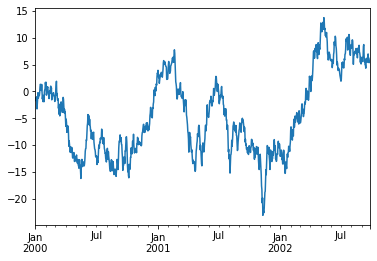

In [171]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000',periods=1000))

ts = ts.cumsum()

ts.plot()

On DataFrame, plot() is a convenience to plot all the columns with labels:

<Figure size 432x288 with 0 Axes>

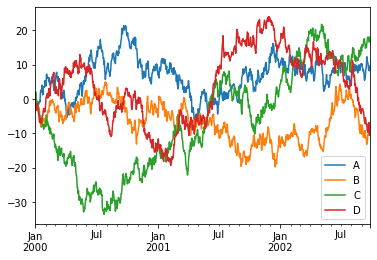

In [173]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A','B','C','D'])

df = df.cumsum()

plt.figure(); df.plot(); plt.legend(loc='best')

## Getting Data In/Out

### CSV

In [174]:
df.to_csv('foo.csv')

In [175]:
pd.read_csv('foo.csv')

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.019206,-0.158614,1.000115,-1.358487
1,2000-01-02,0.607975,0.680145,2.183498,-1.093109
2,2000-01-03,0.259980,0.601172,1.022765,-3.323576
3,2000-01-04,-0.371121,1.103460,-0.574271,-1.919730
4,2000-01-05,-0.560536,-1.352126,-1.356094,-1.430763
...,...,...,...,...,...
995,2002-09-22,8.361904,-9.393268,17.354847,-6.814108
996,2002-09-23,8.424585,-9.512330,16.572528,-8.424440
997,2002-09-24,8.218212,-9.900904,16.625230,-9.947170
998,2002-09-25,9.651979,-10.377771,17.311633,-10.581687


## HDF5

Reading and writing to HDFStores

Writing to a HDF5 Store

In [176]:
df.to_hdf('foo.h5', 'df')

Reading from a HDF5 Store

In [177]:
pd.read_hdf('foo.h5', 'df')

,A,B,C,D
2000-01-01,-0.019206,-0.158614,1.000115,-1.358487
2000-01-02,0.607975,0.680145,2.183498,-1.093109
2000-01-03,0.259980,0.601172,1.022765,-3.323576
2000-01-04,-0.371121,1.103460,-0.574271,-1.919730
2000-01-05,-0.560536,-1.352126,-1.356094,-1.430763
...,...,...,...,...
2002-09-22,8.361904,-9.393268,17.354847,-6.814108
2002-09-23,8.424585,-9.512330,16.572528,-8.424440
2002-09-24,8.218212,-9.900904,16.625230,-9.947170
2002-09-25,9.651979,-10.377771,17.311633,-10.581687


## Excel

REading and Writing to MS Excel

Writing to an excel file

In [178]:
df.to_excel('foo.xlsx', sheet_name='Sheet1')

Reading from an excel file

In [179]:
pd.read_excel('foo.xlsx','Sheet1', index_col=None, na_values=['NA'])

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.019206,-0.158614,1.000115,-1.358487
1,2000-01-02,0.607975,0.680145,2.183498,-1.093109
2,2000-01-03,0.259980,0.601172,1.022765,-3.323576
3,2000-01-04,-0.371121,1.103460,-0.574271,-1.919730
4,2000-01-05,-0.560536,-1.352126,-1.356094,-1.430763
...,...,...,...,...,...
995,2002-09-22,8.361904,-9.393268,17.354847,-6.814108
996,2002-09-23,8.424585,-9.512330,16.572528,-8.424440
997,2002-09-24,8.218212,-9.900904,16.625230,-9.947170
998,2002-09-25,9.651979,-10.377771,17.311633,-10.581687


## Gotchas

If you are trying an operation and you see an exception like

In [180]:
if pd.Series([False,True,False]):
    print('I was true')

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().